### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

#### Validation for header devation concept

In [30]:
# importing the required packages
import pandas as pd
import numpy as np

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
# read the data
df_4 = pd.read_csv(r'validation.csv')

In [5]:
df_4.head()

,P_INV_START_DATE,P_INV_END_DATE,INVOICE_ID,INV,LANE_ID,CURRENCY,LOADING_DATE,INVOICE_DATE,BL_NUMBER,CARRIER,...,RATE_OFFERING_ID,INV_UNIT_PRICE,RATE_CURR,FOURTY_FEET_RATE_RECORD_ID,ASSIGNED_USER,INV_COMMENTS,L_INV_LINE_COMMENTS,CONTRACT_NO,INV_REASON_CODE,INV_CATEGORY
0,1/1/2023,30-04-2023,HLCU-BSC2112AZSG4-2138011963,2138011963,USORF-PKKHI-DRY,PKR,12/31/2021,1/31/2022,BSC2112AZSG4,HLCU,...,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/5/2023,31-08-2023,MSCU-MEDUV8289492-DI157324,DI157324,ESALG-ZADUR-REEFER,ZAR,1/16/2023,2/17/2023,MEDUV8289492,MSCU,...,RO_MSCU_V1,NaN,USD,RR_MSCU_PTLIS-ZADUR-REEFER_MINI_141122,NaN,NaN,NaN,NaN,NaN,NaN
2,01-09-2023,31-12-2023,CMCU-JAXS3M078265-JAXS3M078265,JAXS3M078265,USPHL-PRSJU-DRY,USD,2023-08-24,2023-08-25,JAXS3M078265,CMCU,...,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/2023,30-04-2023,OOLU-2701363570-4163830711,4163830711,IDJKT-MYPKG-DRY,IDR,6/26/2022,6/28/2022,2701363570,OOLU,...,RO_OOLU_V1,145.0,USD,RR_OOLU_IDJKT-MYPKG-DRY_MAIN_010721,NaN,NaN,NaN,GW210021v038,NaN,NaN
4,01-01-2024,29-02-2024,HLCU-SYD231047907-2070014418,2070014418,AUSYD-HKHKG-DRY,HKD,2024-01-01,2024-02-02,SYD231047907,HLCU,...,RO_HLCU_V1,200.0,USD,RR_HLCU_AUSYD-HKHKG-DRY_40_MAIN_010723,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_4.shape

(33066, 79)

In [5]:
# taking the final dataframe
df_for_modeling = df_4[['H_EXCESS_FREIGHT_EUR','REFUND_EUR','NO_OF_CONTAINERS','QUANTITY','INV_LINE_TOTAL','INV_LINE_TOTAL_EUR',
                             'RATE_UNIT_PRICE','RLINE_TOTAL','RLINE_TOTAL_EUR','L_EXCESS_FREIGHT_EUR','INVOICE_ID','LANE_ID','CURRENCY','CARRIER','POL','POD','AMOUNT_DUE','AUDIT_STATUS','INVOICE_TYPE','RATETYPE',
                                 'CALCTYPE','ALTCARRIER','CODE','INV_UNIT_PRICE','ILINE_CURR','ALTLANE_FLAG','CARRIER_NAME','INVOICE_SOURCE','H_TOTAL_DEVIATION']]

In [8]:
df_for_modeling.isnull().sum()

H_EXCESS_FREIGHT_EUR        1
REFUND_EUR                  1
NO_OF_CONTAINERS          529
QUANTITY                    7
INV_LINE_TOTAL              2
INV_LINE_TOTAL_EUR          1
RATE_UNIT_PRICE             1
RLINE_TOTAL                 1
RLINE_TOTAL_EUR             1
L_EXCESS_FREIGHT_EUR        1
INVOICE_ID                  1
LANE_ID                     8
CURRENCY                    1
CARRIER                     1
POL                         1
POD                         1
AMOUNT_DUE                  1
AUDIT_STATUS               10
INVOICE_TYPE                9
RATETYPE                    9
CALCTYPE                    9
ALTCARRIER              27273
CODE                        1
INV_UNIT_PRICE           8385
ILINE_CURR                  2
ALTLANE_FLAG                1
CARRIER_NAME                1
INVOICE_SOURCE             15
H_TOTAL_DEVIATION           1
dtype: int64

In [6]:
# remove 'ALTCARRIER','INV_UNIT_PRICE' since there are many null values.
df_for_modeling.drop(columns = ['ALTCARRIER','INV_UNIT_PRICE','LANE_ID'], inplace = True)

In [7]:
# Extract numeric values from strings using a regular expression
df_for_modeling['amount_numeric'] = df_for_modeling['AMOUNT_DUE'].str.extract(r'(\d+\.\d+)').astype(float)

In [8]:
df_for_modeling['H_TOTAL_DEVIATION'] = df_for_modeling['H_TOTAL_DEVIATION'].str.extract(r'([-]?\d+\.\d+)').astype(float)

In [9]:
# consider only these contract charges OCF, BAF, DTHC, OTHC for both 20ft & 40ft
df_for_modeling = df_for_modeling[(df_for_modeling['CODE'] == 'OCF_40')|(df_for_modeling['CODE'] == 'OCF_20') | (df_for_modeling['CODE'] == 'BAF_40') |(df_for_modeling['CODE'] == 'BAF_20') | (df_for_modeling['CODE'] == 'DTHC_40') |(df_for_modeling['CODE'] == 'DTHC_20') | (df_for_modeling['CODE'] == 'OTHC_40') | (df_for_modeling['CODE'] == 'OTHC_20')]

In [10]:
df_for_modeling.drop_duplicates(subset = 'INVOICE_ID', keep = 'first',inplace = True)

In [11]:
# drop the invoice id column since it might lead to overfitting of the model
df_for_modeling.drop(columns = ['INVOICE_ID','AMOUNT_DUE'], inplace = True)

In [12]:
# deriving the target column from 'H_EXCESS_FREIGHT_EUR', and 'L_EXCESS_FREIGHT_EUR' based on their values
conditions = [
    (df_for_modeling['H_TOTAL_DEVIATION'] < 0),  # Both negative
    (df_for_modeling['H_TOTAL_DEVIATION'] == 0),
    (df_for_modeling['H_TOTAL_DEVIATION'] > 0)
]
choices = ['neg', 'ok', 'pos']

# Create the new column based on the conditions and choices
df_for_modeling['act_invoice_status'] = np.select(conditions, choices, default='ok')

In [13]:
# Define a mapping dictionary
status_mapping = {'ok': 0, 'neg': 1, 'pos': 2}

# Replace the categorical values with the defined mapping
df_for_modeling['invoice_status_code'] = df_for_modeling['act_invoice_status'].replace(status_mapping)

In [14]:
df_for_modeling.drop(columns = ['H_EXCESS_FREIGHT_EUR','L_EXCESS_FREIGHT_EUR','H_TOTAL_DEVIATION','act_invoice_status'], inplace = True)

In [15]:
df_for_modeling.shape

(14460, 23)

In [52]:
df_for_modeling['invoice_status_code'].value_counts()

invoice_status_code
2    6115
1    5463
0    2882
Name: count, dtype: int64

In [53]:
df_for_modeling.dtypes

REFUND_EUR             float64
NO_OF_CONTAINERS       float64
QUANTITY               float64
INV_LINE_TOTAL         float64
INV_LINE_TOTAL_EUR     float64
RATE_UNIT_PRICE        float64
RLINE_TOTAL            float64
RLINE_TOTAL_EUR        float64
CURRENCY                object
CARRIER                 object
POL                     object
POD                     object
AUDIT_STATUS            object
INVOICE_TYPE            object
RATETYPE                object
CALCTYPE                object
CODE                    object
ILINE_CURR              object
ALTLANE_FLAG            object
CARRIER_NAME            object
INVOICE_SOURCE          object
amount_numeric         float64
invoice_status_code      int64
dtype: object

In [15]:
# Identify categorical variables. You might want to exclude certain columns that are not useful for modeling.
categorical_cols = df_for_modeling.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to these columns
df_ohe = pd.get_dummies(df_for_modeling, columns=categorical_cols)

In [16]:
df_ohe.dropna(inplace = True)

In [58]:
df_ohe['invoice_status_code'].isnull().sum()

0

In [17]:
df_ohe.shape

(13497, 698)

In [19]:
df_ohe['invoice_status_code'].value_counts()

invoice_status_code
2    5739
1    5214
0    2544
Name: count, dtype: int64

In [18]:
from joblib import load
header_model = load(r'Inputs/head_dev_classifier.joblib')

In [29]:
!ls

invoice.csv
UGOF.UL_INVOICE_PROCESS_REPORT_V1 (3).csv
UGOF.UL_INVOICE_PROCESS_REPORT_V1 (4).csv
UGOF.UL_INVOICE_PROCESS_REPORT_V1 (5).csv
UGOF.UL_INVOICE_PROCESS_REPORT_V1 (6).csv


In [42]:
def align_features(train_df, val_df):
    # Add missing dummy columns to validation set
    for column in train_df.columns:
        if column not in val_df.columns:
            val_df[column] = 0
    
    # Remove extra columns from validation set
    for column in val_df.columns:
        if column not in train_df.columns:
            val_df.drop(column, axis=1, inplace=True)
    
    # Ensure the order of columns matches the training set
    val_df = val_df[train_df.columns]
    
    return val_df

In [20]:
df_train = pd.read_csv(r'Inputs/train.csv')

In [47]:
df_train = df_train[['

Index(['Unnamed: 0', 'REFUND_EUR', 'NO_OF_CONTAINERS', 'QUANTITY',
       'INV_LINE_TOTAL', 'INV_LINE_TOTAL_EUR', 'RATE_UNIT_PRICE',
       'RLINE_TOTAL', 'RLINE_TOTAL_EUR', 'amount_numeric',
       ...
       'INVOICE_SOURCE_OMPROMPT JUNE - 2023',
       'INVOICE_SOURCE_OMPROMPT JUNE 2023', 'INVOICE_SOURCE_OMPROMPT MAY 2023',
       'INVOICE_SOURCE_OMPROMPT NOVEMBER 2023',
       'INVOICE_SOURCE_OMPROMPT NOVEMBER 2023 RESIDUE',
       'INVOICE_SOURCE_OMPROMPT OCT 2023',
       'INVOICE_SOURCE_OMPROMPT OCTOBER 2023',
       'INVOICE_SOURCE_OMPROMPT PRANAV UPLOAD',
       'INVOICE_SOURCE_OMPROMPT Q2 - 2023',
       'INVOICE_SOURCE_OMPROMPT SEP 2023'],
      dtype='object', length=761)

In [21]:
df_train.shape

(35225, 761)

In [63]:
df_train['invoice_status_code'].value_counts()

invoice_status_code
2    14173
1    13674
0     7378
Name: count, dtype: int64

In [22]:
df_val_processed = align_features(df_train, df_ohe)

In [23]:
df_val_processed.shape

(13497, 761)

In [25]:
df_val_processed['invoice_status_code'].value_counts()

invoice_status_code
2    5739
1    5214
0    2544
Name: count, dtype: int64

In [24]:
# target variable is not included in the unseen data
y_actual = df_val_processed['invoice_status_code'].copy()
X_unseen = df_val_processed.drop('invoice_status_code', axis=1, errors='ignore')

In [31]:
df_val_processed.head()

,Unnamed: 0,REFUND_EUR,NO_OF_CONTAINERS,QUANTITY,INV_LINE_TOTAL,INV_LINE_TOTAL_EUR,RATE_UNIT_PRICE,RLINE_TOTAL,RLINE_TOTAL_EUR,amount_numeric,...,INVOICE_SOURCE_OMPROMPT JUNE - 2023,INVOICE_SOURCE_OMPROMPT JUNE 2023,INVOICE_SOURCE_OMPROMPT MAY 2023,INVOICE_SOURCE_OMPROMPT NOVEMBER 2023,INVOICE_SOURCE_OMPROMPT NOVEMBER 2023 RESIDUE,INVOICE_SOURCE_OMPROMPT OCT 2023,INVOICE_SOURCE_OMPROMPT OCTOBER 2023,INVOICE_SOURCE_OMPROMPT PRANAV UPLOAD,INVOICE_SOURCE_OMPROMPT Q2 - 2023,INVOICE_SOURCE_OMPROMPT SEP 2023
1,0,0.0,4.0,4.0,356573.13,18718.41,1813.0,7252.0,6732.46,22732.37,...,False,False,False,False,False,False,False,False,False,False
2,0,0.0,1.0,1.0,82.00,76.39,0.0,0.0,0.00,5708.96,...,False,False,False,False,False,False,False,False,False,False
3,0,0.0,1.0,1.0,2138170.00,127.09,145.0,145.0,136.73,127.09,...,False,False,False,False,False,False,False,False,False,False
6,0,0.0,1.0,1.0,10830.53,183.61,190.0,190.0,174.18,468.68,...,False,False,True,False,False,False,False,False,False,False
7,0,0.0,2.0,2.0,3787.35,186.68,0.0,0.0,0.00,1895.35,...,False,False,False,False,False,False,False,False,False,False


In [25]:
if 'Unnamed: 0' in X_unseen.columns:
    X_unseen = X_unseen.drop('Unnamed: 0', axis=1)

In [26]:
# Make predictions
predictions = header_model.predict(X_unseen)

In [94]:
X_unseen.shape

(16330, 759)

In [27]:
# Create a DataFrame for the predictions
df_predictions = pd.DataFrame(predictions, columns=['predictions'])

# Append the actual values
df_predictions['actual'] = y_actual.reset_index(drop=True)  # Reset index to ensure alignment if needed

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(df_predictions['actual'], df_predictions['predictions'])
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(df_predictions['actual'], df_predictions['predictions'], average='weighted')
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(df_predictions['actual'], df_predictions['predictions'], average='weighted')
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(df_predictions['actual'], df_predictions['predictions'], average='weighted')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9250
Precision: 0.9253
Recall: 0.9250
F1 Score: 0.9250


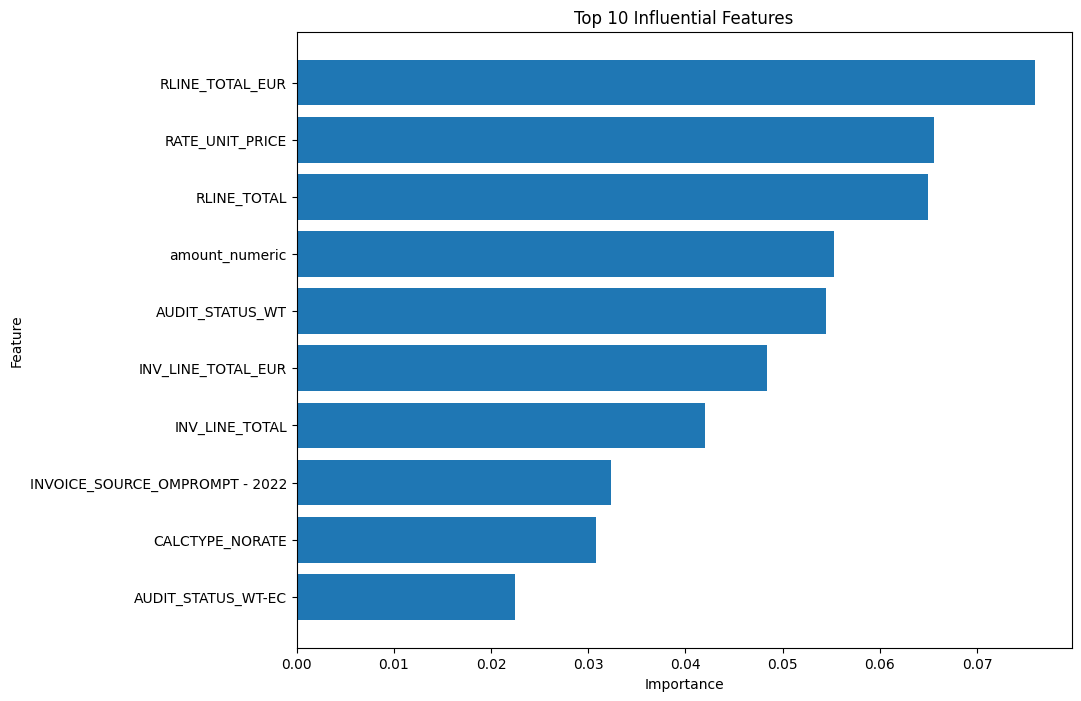

In [114]:
import matplotlib.pyplot as plt

# Check if the model has 'feature_importances_' attribute
if hasattr(header_model, 'feature_importances_'):
    # Get feature importances
    importances = header_model.feature_importances_
    # Get feature names
    feature_names = X_unseen.columns
    
    # Create a DataFrame to visualize them
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
     # Sort the DataFrame by importance in descending order and select the top 20
    top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.barh(top_features['Feature'], top_features['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Top 10 Influential Features')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
    plt.show()
else:
    print("Model does not support feature importance directly")

In [116]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.6/538.6 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 65.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 23.5 MB/s eta 0:00:00:00:0100:01


In [29]:
import shap
# Create the SHAP Explainer
explainer = shap.TreeExplainer(header_model)
# shap_values = explainer.shap_values(X_unseen)

In [ ]:
explainer = shap.KernelExplainer(header_model.predict_proba, shap.sample(X_unseen, 1000))
shap_values = explainer.shap_values(shap.sample(X_unseen, 1000), nsamples=1000)  # Limit the number of samples

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1000 [00:00<?, ?it/s]

#### Validation for line level deviation concept

In [34]:
# taking the final dataframe
df_for_ll_modeling = df_4[['H_EXCESS_FREIGHT_EUR','REFUND_EUR','NO_OF_CONTAINERS','QUANTITY','INV_LINE_TOTAL','INV_LINE_TOTAL_EUR',
                             'L_EXCESS_FREIGHT_EUR','INVOICE_ID','LANE_ID','CURRENCY','CARRIER','POL','POD','AMOUNT_DUE','INVOICE_TYPE',
                                 'ALTCARRIER','CODE','INV_UNIT_PRICE','ILINE_CURR','ALTLANE_FLAG','INVOICE_SOURCE','LINE_DEVIATION']]

In [35]:
# remove 'ALTCARRIER','INV_UNIT_PRICE' since there are many null values.
df_for_ll_modeling.drop(columns = ['ALTCARRIER','INV_UNIT_PRICE','LANE_ID'], inplace = True)

In [36]:
# Extract numeric values from strings using a regular expression
df_for_ll_modeling['amount_numeric'] = df_for_ll_modeling['AMOUNT_DUE'].str.extract(r'(\d+\.\d+)').astype(float)

In [37]:
df_for_ll_modeling['LINE_DEVIATION'] = df_for_ll_modeling['LINE_DEVIATION'].str.extract(r'([-]?\d+\.\d+)').astype(float)

In [38]:
# consider only these contract charges OCF, BAF, DTHC, OTHC for both 20ft & 40ft
df_for_ll_modeling = df_for_ll_modeling[(df_for_ll_modeling['CODE'] == 'OCF_40')|(df_for_ll_modeling['CODE'] == 'OCF_20') | (df_for_ll_modeling['CODE'] == 'BAF_40') |(df_for_ll_modeling['CODE'] == 'BAF_20') | (df_for_ll_modeling['CODE'] == 'DTHC_40') |(df_for_ll_modeling['CODE'] == 'DTHC_20') | (df_for_ll_modeling['CODE'] == 'OTHC_40') | (df_for_ll_modeling['CODE'] == 'OTHC_20')]

In [39]:
# drop the invoice id column since it might lead to overfitting of the model
df_for_ll_modeling.drop(columns = ['INVOICE_ID','AMOUNT_DUE'], inplace = True)
# deriving the target column from 'LINE_DEVIATION'
conditions = [
    (df_for_ll_modeling['LINE_DEVIATION'] < 0),  # Both negative
    (df_for_ll_modeling['LINE_DEVIATION'] == 0),
    (df_for_ll_modeling['LINE_DEVIATION'] > 0)
]
choices = ['neg', 'ok', 'pos']

# Create the new column based on the conditions and choices
df_for_ll_modeling['invoice_status'] = np.select(conditions, choices, default='ok')
# Define a mapping dictionary
status_mapping = {'ok': 0, 'neg': 1, 'pos': 2}

# Replace the categorical values with the defined mapping
df_for_ll_modeling['invoice_status_code'] = df_for_ll_modeling['invoice_status'].replace(status_mapping)
df_for_ll_modeling.drop(columns = ['H_EXCESS_FREIGHT_EUR','L_EXCESS_FREIGHT_EUR','LINE_DEVIATION','invoice_status'], inplace = True)

In [61]:
df_for_ll_modeling.columns

Index(['REFUND_EUR', 'NO_OF_CONTAINERS', 'QUANTITY', 'INV_LINE_TOTAL',
       'INV_LINE_TOTAL_EUR', 'CURRENCY', 'CARRIER', 'POL', 'POD',
       'INVOICE_TYPE', 'CODE', 'ILINE_CURR', 'ALTLANE_FLAG', 'INVOICE_SOURCE',
       'amount_numeric', 'invoice_status_code'],
      dtype='object')

In [40]:
# Identify categorical variables. You might want to exclude certain columns that are not useful for modeling.
categorical_cols = df_for_ll_modeling.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to these columns
df_ll_ohe = pd.get_dummies(df_for_ll_modeling, columns=categorical_cols)
df_ll_ohe.dropna(inplace = True)

In [41]:
line_model = load(r'linedev_classifier2.joblib')

In [54]:
df_train = pd.read_csv(r'train_set.csv')

In [55]:
df_val_processed = align_features(df_train, df_ll_ohe)

In [56]:
# target variable is not included in the unseen data
y_actual = df_val_processed['invoice_status_code'].copy()
X_unseen = df_val_processed.drop('invoice_status_code', axis=1, errors='ignore')

In [57]:
if 'Unnamed: 0' in X_unseen.columns:
    X_unseen = X_unseen.drop('Unnamed: 0', axis=1)

In [58]:
# Make predictions
predictions = line_model.predict(X_unseen)

In [59]:
# Create a DataFrame for the predictions
df_predictions = pd.DataFrame(predictions, columns=['predictions'])

# Append the actual values
df_predictions['actual'] = y_actual.reset_index(drop=True)  # Reset index to ensure alignment if needed

In [60]:
# Calculate accuracy
accuracy = accuracy_score(df_predictions['actual'], df_predictions['predictions'])
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(df_predictions['actual'], df_predictions['predictions'], average='weighted')
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(df_predictions['actual'], df_predictions['predictions'], average='weighted')
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(df_predictions['actual'], df_predictions['predictions'], average='weighted')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9040
Precision: 0.9039
Recall: 0.9040
F1 Score: 0.9039


In [111]:
df_predictions.shape

(16330, 2)

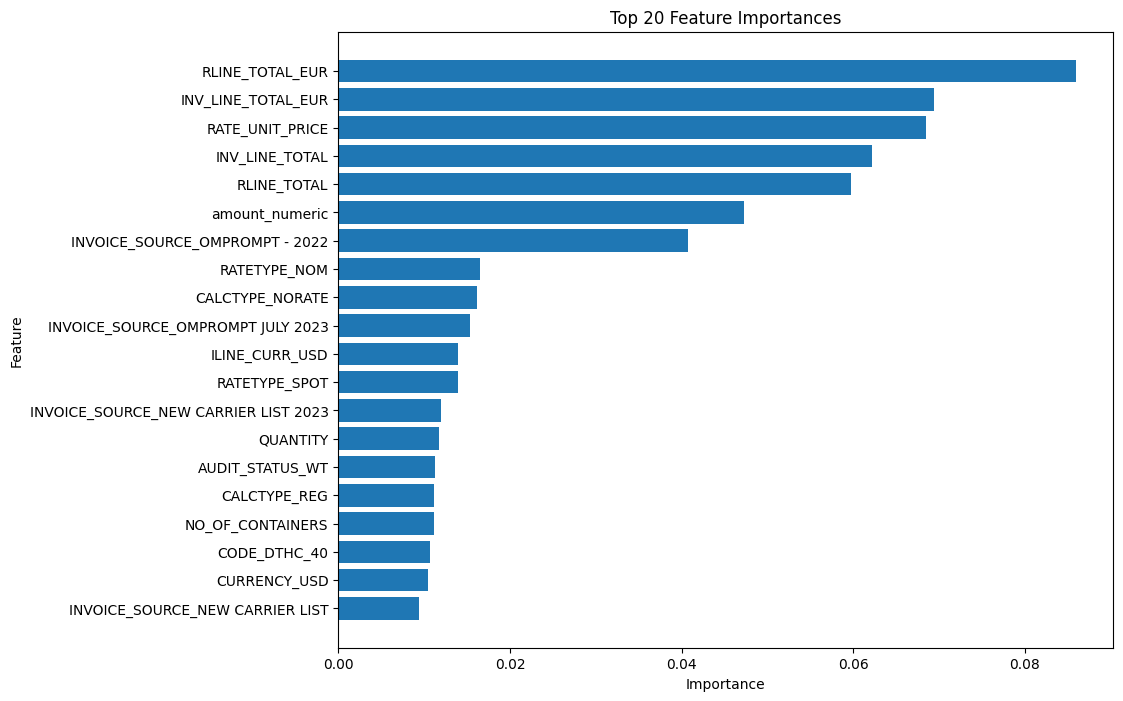

In [112]:
# Check if the model has 'feature_importances_' attribute
if hasattr(line_model, 'feature_importances_'):
    # Get feature importances
    importances = line_model.feature_importances_
    # Get feature names
    feature_names = X_unseen.columns
    
    # Create a DataFrame to visualize them
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
     # Sort the DataFrame by importance in descending order and select the top 20
    top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.barh(top_features['Feature'], top_features['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Top 20 Feature Importances')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
    plt.show()
else:
    print("Model does not support feature importance directly")

In [198]:
!pip install gradio --user

  Using cached gradio-4.27.0-py3-none-any.whl.metadata (15 kB)
  Using cached altair-5.3.0-py3-none-any.whl.metadata (9.2 kB)
  Using cached fastapi-0.110.2-py3-none-any.whl.metadata (24 kB)
  Using cached gradio_client-0.15.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached httpx-0.27.0-py3-none-any.whl.metadata (7.2 kB)
  Using cached huggingface_hub-0.22.2-py3-none-any.whl.metadata (12 kB)
  Using cached orjson-3.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (49 kB)
  Using cached pydantic-2.7.1-py3-none-any.whl.metadata (107 kB)
  Using cached python_multipart-0.0.9-py3-none-any.whl.metadata (2.5 kB)
  Using cached typer-0.12.3-py3-none-any.whl.metadata (15 kB)
  Using cached uvicorn-0.29.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached httpcore-1.0.5-py3-none-any.whl.metadata (20 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached filelock-3.13.4-py3-none-any.whl.metadata (2.8 kB)
  Using cached annotated_types-0.6.0-py3-non

In [1]:
import gradio as gr
import pandas as pd
from joblib import load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your pre-trained model
model = load(r'../linedev_classifier.joblib')

def preprocess_and_predict(uploaded_file):
    # Load the uploaded Excel file
    df = pd.read_excel(uploaded_file)

    # Preprocessing as per your code snippet above
    df['amount_numeric'] = df['AMOUNT_DUE'].str.extract(r'(\d+\.\d+)').astype(float)
    df = df[df['CODE'].isin(['OCF_40', 'OCF_20', 'BAF_40', 'BAF_20', 'DTHC_40', 'DTHC_20', 'OTHC_40', 'OTHC_20'])]
    df.drop(columns=['INVOICE_ID', 'AMOUNT_DUE'], inplace=True)
    
    # Conditions for deriving the target column
    conditions = [
        (df['LINE_DEVIATION'] < 0),
        (df['LINE_DEVIATION'] == 0),
        (df['LINE_DEVIATION'] > 0)
    ]
    choices = ['neg', 'ok', 'pos']
    df['invoice_status'] = np.select(conditions, choices, default='ok')
    status_mapping = {'ok': 0, 'neg': 1, 'pos': 2}
    df['invoice_status_code'] = df['invoice_status'].replace(status_mapping)

    # One-hot encode categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns=categorical_cols)
    df.dropna(inplace=True)
    
    # Prediction
    X = df.drop('invoice_status_code', axis=1, errors='ignore')
    predictions = model.predict(X)

    # Compute Metrics
    actuals = df['invoice_status_code'].copy()
    accuracy = accuracy_score(actuals, predictions)
    precision = precision_score(actuals, predictions, average='weighted')
    recall = recall_score(actuals, predictions, average='weighted')
    f1 = f1_score(actuals, predictions, average='weighted')

    return {
        "Predictions": predictions.tolist(),
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

In [ ]:
# Set up Gradio interface
iface = gr.Interface(
    fn=preprocess_and_predict,
    inputs=gr.File(label="Upload your Excel file"),
    outputs=[
        gr.Text(label="Predictions"),
        gr.Text(label="Accuracy"),
        gr.Text(label="Precision"),
        gr.Text(label="Recall"),
        gr.Text(label="F1 Score")
    ],
    title="Invoice Risk Assessment",
    description="Upload an Excel file to assess the risk of invoices."
)

iface.launch(server_name='0.0.0.0')

In [201]:
import gradio

ModuleNotFoundError: No module named 'gradio'